# SCA Inter-Kingdom Events Visualization

You only need to run the cell with `!pip install` once per system

We request the calendar datafeed for each kingdom and convert the (filtered) results to Pandas dataframes.
Then we concatenate all of the dataframes together. Then the magic begins.

Each individual dataframe must have the following columns: event-name, start-date, end-date, type, kingdom
start-date and end-date should be dates, not date-times. 
type should be either event or kingdom event. Default value is event.
kingdom is the name of the Kingdom the event-row belongs to

Any dataset missing a column should have it inserted with default or null data

In [1]:
!pip install --upgrade pandas icalendar matplotlib calmap calplot requests

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [1]:
# dataframe creation libraries
import json
import requests
import pandas as pd
import icalendar
from datetime import datetime, timedelta, timezone, date
import pytz
from dateutil.rrule import *
import cal_utils
import secrets
import kingdoms
import calmap

In [2]:
# Some Global Settings
rightnow = datetime.now(pytz.timezone('America/New_York'))
utc = pytz.timezone('UTC')
today = rightnow.date()
this_year = today + timedelta(days=365)

In [3]:
# Aethelmearc
aeth_url = secrets.Aethelmearc['url']
aeth_calendar = requests.get(aeth_url).text
cal_obj = icalendar.Calendar.from_ical(aeth_calendar)
caldates, calevents = cal_utils.walk_calendar(cal_obj, 365, rightnow, "America/New_York")
aeth_sorted = cal_utils.sort_events(caldates, calevents)
aeth_df = pd.DataFrame.from_dict(aeth_sorted)
aeth_df

start                       end  \
0  2022-07-09 08:30:00-04:00 2022-07-09 20:00:00-04:00   
1  2022-07-15 17:00:00-04:00 2022-07-17 12:00:00-04:00   
2  2022-07-22 04:00:00-04:00 2022-07-24 18:00:00-04:00   
3  2022-07-29 00:00:00-04:00 2022-08-15 23:59:59-04:00   
4  2022-08-19 16:00:00-04:00 2022-08-21 12:00:00-04:00   
5  2022-08-26 16:00:00-04:00 2022-08-28 00:00:00-04:00   
6  2022-09-02 00:00:00-04:00 2022-09-05 23:59:59-04:00   
7  2022-09-10 00:00:00-04:00 2022-09-11 23:59:59-04:00   
8  2022-09-17 08:00:00-04:00 2022-09-17 17:00:00-04:00   
9  2022-09-23 17:00:00-04:00 2022-09-25 12:00:00-04:00   
10 2022-10-01 00:00:00-04:00 2022-10-02 23:59:59-04:00   
11 2022-10-08 00:00:00-04:00 2022-10-09 23:59:59-04:00   
12 2022-10-14 17:00:00-04:00 2022-10-16 19:00:00-04:00   
13 2022-10-15 00:00:00-04:00 2022-10-16 23:59:59-04:00   
14 2022-10-28 00:00:00-04:00 2022-10-31 23:59:59-04:00   
15 2022-11-05 00:00:00-04:00 2022-11-06 23:59:59-05:00   
16 2022-11-12 00:00:00-05:00 2022-11-13 23:59:59-05:00   
17 2022-12-03 00:00:00-05:00 2022-12-04 23:59:59-05:00   
18 2023-02-11 00:00:00-05:00 2023-02-12 23:59:59-05:00   
19 2023-05-18 00:00:00-04:00 2023-05-22 23:59:59-04:00   

                                              summary  \
0                                  Pax Interuptus XLV   
1                       St. Swithin's Bog 3-Day Event   
2   *Online* Known World Heraldic and Scribal Symp...   
3                                    Pennsic War XLIX   
4                                     Scribal Retreat   
5                                Seven Pearls Tourney   
6                          A Shoote in the Wylderwood   
7                     **Cancelled** Summer's End 2022   
8         Fall Coronation PREFERRED Date (ANY REGION)   
9                                 Harvest Raid XXVIII   
10                                 Archers to theWald   
11  Fall Crown Tournament PREFERRED Date (Region 3...   
12          *Online* Daigaku-ryō: Pan Asia University   
13                                       Tavern Brawl   
14                           Fiber, Fabric & Fighting   
15                 Festival of the Burning of Krampus   
16  Fall Æthelmearc Academy SUGGESTED Date (Region...   
17                           Barony of Delftwood Yule   
18                     Feast of the Seven Deadly Sins   
19                           Aethelmearc War Practice   

                                             location  
0   Genesee Community College, 1 College Road, Bat...  
1   New Germany Grove Hall, 1635 New Germany Rd, S...  
2      Generic Online Event, PA, 17941, United States  
3   Pennsic, 205 Currie Road, Slippery Rock, PA, 1...  
4   Seven Hills Girl Scout Camp, 10299 Savage Road...  
5   Seven Hills Girl Scout Camp, 10299 Savage Road...  
6                    Generic Syracuse Zip Code, 13204  
7                     Generic Buffalo Zip Code, 14215  
8                                  Default Any, 15767  
9   Lake Chautaqua Lutheran Center, 5013 Route 430...  
10      Generic Steltonwald, PA, 15061, United States  
11                                  Default R3, 18515  
12     Generic Online Event, PA, 17941, United States  
13                                Generic BMDL, 15219  
14                        Generic ACG Zip Code, 17857  
15                   Generic Syracuse Zip Code, 13204  
16                                  Default R4, 14454  
17  Generic Region 5, Ithaca, NY, 14850, United St...  
18  Generic Region 5, Ithaca, NY, 14850, United St...  
19  Cooper’s Lake Campground, 205 Currie Road, Sli...

In [4]:
aethelmearc_frame = kingdoms.ical_clean(aeth_df, "Aethelmearc")

In [5]:
# An Tir (iCal)
antir_url = secrets.AnTir['url']
antir_calendar = requests.get(antir_url).text
cal_obj = icalendar.Calendar.from_ical(antir_calendar)
caldates, calevents = cal_utils.walk_calendar(cal_obj, 365, rightnow, "America/New_York")
antir_sorted = cal_utils.sort_events(caldates, calevents)
antir_df = pd.DataFrame.from_dict(antir_sorted)
antir_frame = kingdoms.ical_clean(antir_df, "An Tir")

In [6]:
# Ansteorra (iCal)
anst_url = secrets.Ansteorra['url']
ansteorra_calendar = requests.get(anst_url).text
cal_obj = icalendar.Calendar.from_ical(ansteorra_calendar)
caldates, calevents = cal_utils.walk_calendar(cal_obj, 365, rightnow, "America/New_York")
ansteorra_sorted = cal_utils.sort_events(caldates, calevents)
anst_df = pd.DataFrame.from_dict(ansteorra_sorted)
ansteorra_frame = kingdoms.ical_clean(anst_df, "Ansteorra")

In [7]:
# Artemisia (iCal)
artem_url = secrets.Ansteorra['url']
artemisia_calendar = requests.get(artem_url).text
cal_obj = icalendar.Calendar.from_ical(artemisia_calendar)
caldates, calevents = cal_utils.walk_calendar(cal_obj, 365, rightnow, "America/New_York")
artemisia_sorted = cal_utils.sort_events(caldates, calevents)
artem_df = pd.DataFrame.from_dict(artemisia_sorted)
artemisia_frame = kingdoms.ical_clean(artem_df, "Artemisia")

In [8]:
# Calontir (iCal)
calontir_url = secrets.Calontir['url']
calontir_calendar = requests.get(calontir_url).text
cal_obj = icalendar.Calendar.from_ical(calontir_calendar)
caldates, calevents = cal_utils.walk_calendar(cal_obj, 365, rightnow, "America/New_York")
calontir_sorted = cal_utils.sort_events(caldates, calevents)
ct_df = pd.DataFrame.from_dict(calontir_sorted)
calontir_frame = kingdoms.ical_clean(ct_df, "Calontir")

In [9]:
# Drachenwald (json)
dwurl = secrets.Drachenwald['url']
dw_json_data = requests.get(dwurl).text
dw_df = pd.read_json(dw_json_data)
drachenwald_frame = kingdoms.Drachenwald(dw_df)

In [10]:
# East (json)
url = secrets.East['url']
json_data = requests.get(url).text
df = pd.read_json(json_data)
east_frame = kingdoms.East(df)

In [11]:
# Run after all calendars have been collected and converted
frames = [
    aethelmearc_frame,
    antir_frame,
    ansteorra_frame, 
    artemisia_frame,
    calontir_frame, 
    drachenwald_frame, 
    east_frame
    ]
events = pd.concat(frames, ignore_index=True)
events = events.sort_values(by=['start-date'])

In [12]:
# Calculate date overlaps - 
# for each date in now to now + 365: 
# how many rows = start-date < date and end-date > date

# set up our dates
start_date = rightnow.date()
year = timedelta(days=365)
delta = timedelta(days=1)
end_date = start_date + year

collisions = cal_utils.calc_collisions(events, start_date, 365, 1)

In [13]:
heatmap_df = pd.DataFrame.from_dict(collisions)
heatmap_df.index = pd.to_datetime(heatmap_df['date'])
heatmap_df = heatmap_df.drop(columns=['date'])

In [14]:
heatmap_df.plot(figsize=(25, 20), subplots=True)
heatmap_df.plot

In [15]:
heatmap_aethelmearc = pd.Series(heatmap_df.aethelmearc)
heatmap_antir = pd.Series(heatmap_df.an_tir)
heatmap_ansteorra = pd.Series(heatmap_df.ansteorra)
heatmap_artemisia = pd.Series(heatmap_df.artemisia)
heatmap_calontir = pd.Series(heatmap_df.calontir)
heatmap_drachenwald = pd.Series(heatmap_df.drachenwald)
heatmap_east = pd.Series(heatmap_df.east)
heatmap_total = pd.Series(heatmap_df.total)

In [16]:
# Dates Heatmap
start_year = heatmap_total.first("1D").index.year.view(int)[0]
end_year = heatmap_total.last("1D").index.year.view(int)[0]
vmax = heatmap_total.max()

<AxesSubplot:>

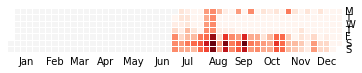

In [17]:
# testing out calmap's yearplot
calmap.yearplot(
    heatmap_total,
    year=start_year,
    vmin=0,
    vmax=vmax,
    daylabels='MTWTFSS',
    dayticks=True,
    monthticks=True,
    cmap=u'Reds',
    linewidth=1,    
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


(<Figure size 1800x864 with 2 Axes>,
 array([<AxesSubplot:ylabel='2022'>, <AxesSubplot:ylabel='2023'>],
       dtype=object))

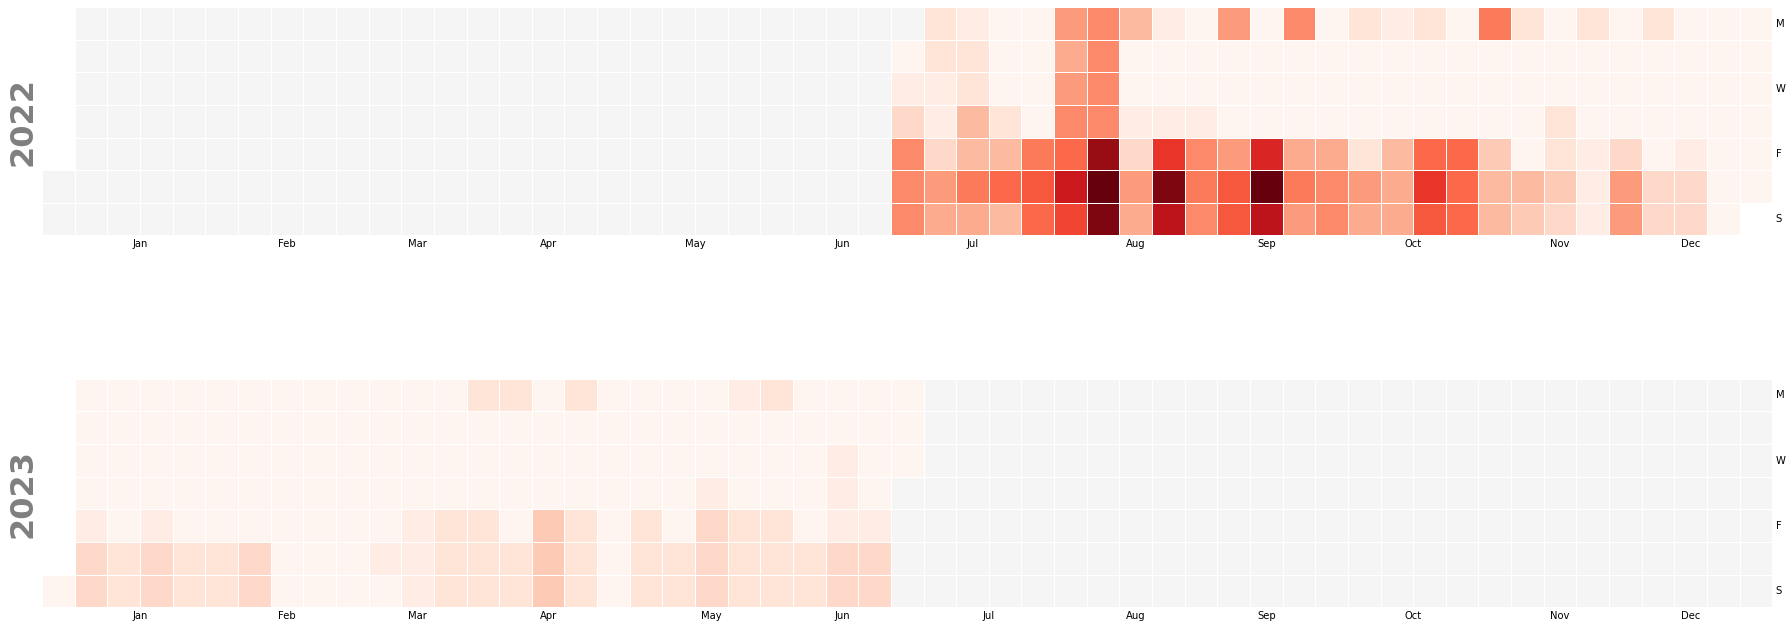

In [18]:
# testing out calmap's calendarplot
calmap.calendarplot(
    heatmap_total, 
    yearlabel_kws=({'color': 'gray'}),
    monthticks=3, 
    daylabels='MTWTFSS', 
    dayticks=[0,2,4,6], 
    cmap=u'Reds',
    linewidth=1, 
    fig_kws=dict(figsize=(25,12)),
    vmin=0,
    vmax=vmax
)

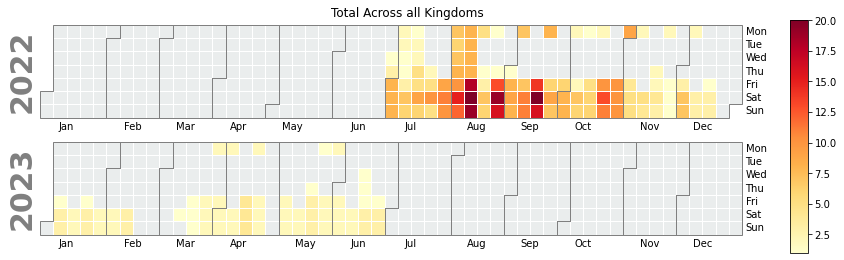

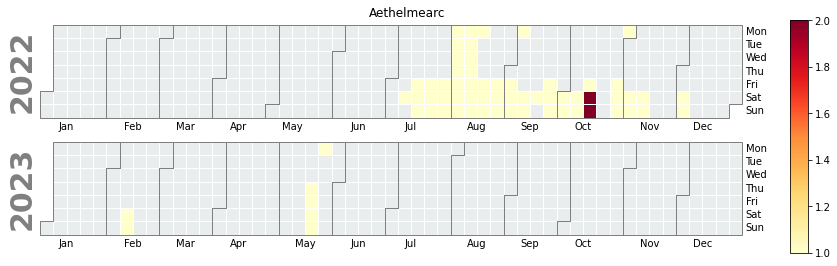

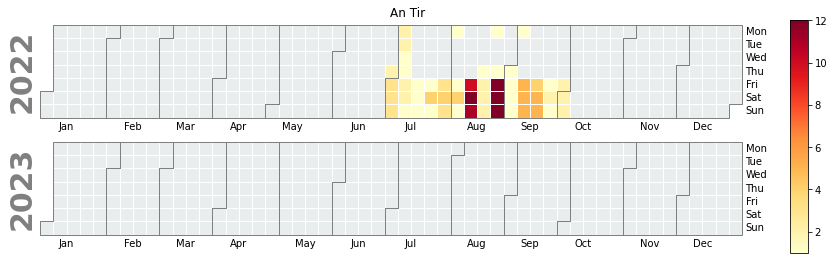

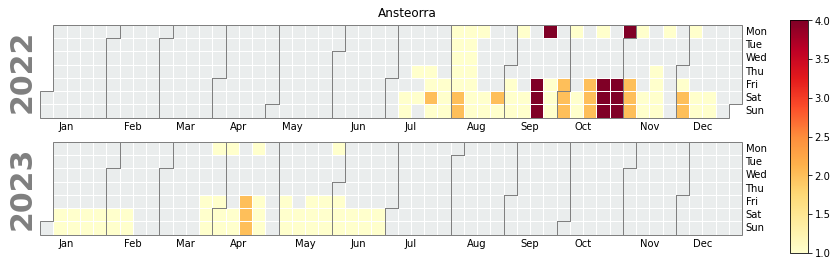

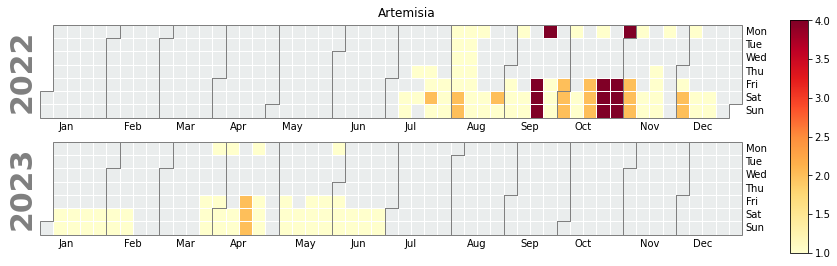

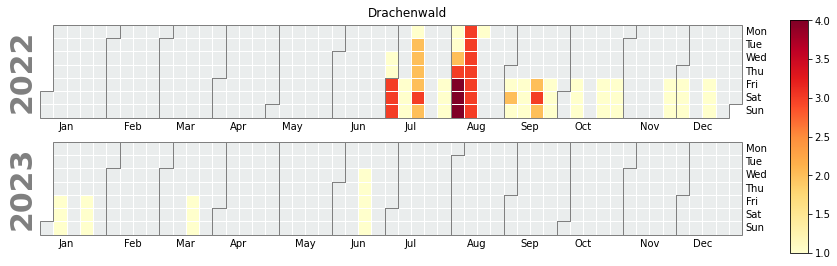

In [23]:
# testing out calplot's calplot module
import calplot
colormap = "YlOrRd"
fig, axes = calplot.calplot(
    heatmap_total,
    colorbar=True,
    cmap=colormap,
    fillcolor='#EAEDED',
    suptitle="Total Across all Kingdoms"
)
fig_aethelmearc, axes_aethelmearc = calplot.calplot(
    heatmap_aethelmearc,
    colorbar=True,
    cmap=colormap,
    fillcolor='#EAEDED',
    suptitle="Aethelmearc"
)
fig_antir, axes_antir = calplot.calplot(
    heatmap_antir,
    colorbar=True,
    cmap=colormap,
    fillcolor='#EAEDED',
    suptitle="An Tir"
)
fig_ansteorra, axes_ansteorra = calplot.calplot(
    heatmap_ansteorra,
    colorbar=True,
    cmap=colormap,
    fillcolor='#EAEDED',
    suptitle="Ansteorra"
)
fig_artemisia, axes_artemisia = calplot.calplot(
    heatmap_artemisia,
    colorbar=True,
    cmap=colormap,
    fillcolor='#EAEDED',
    suptitle="Artemisia"
)
fig_calontir, axes_calontir = calplot.calplot(
    heatmap_calontir,
    colorbar=True,
    cmap=colormap,
    fillcolor='#EAEDED',
    suptitle="Calontir"
)
fig_drachenwald, axes_drachenwald = calplot.calplot(
    heatmap_drachenwald,
    colorbar=True,
    cmap=colormap,
    fillcolor='#EAEDED',
    suptitle="Drachenwald"
)
fig_east, axes_east = calplot.calplot(
    heatmap_east,
    colorbar=True,
    cmap=colormap,
    fillcolor='#EAEDED',
    suptitle="East"
)